## Columns- Wise Sample

In [23]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Epoch 10/150, Loss: 0.6729
Epoch 20/150, Loss: 0.6583
Epoch 30/150, Loss: 0.6489
Epoch 40/150, Loss: 0.6429
Epoch 50/150, Loss: 0.6390
Epoch 60/150, Loss: 0.6365
Epoch 70/150, Loss: 0.6348
Epoch 80/150, Loss: 0.6337
Epoch 90/150, Loss: 0.6330
Epoch 100/150, Loss: 0.6325
Epoch 110/150, Loss: 0.6321
Epoch 120/150, Loss: 0.6319
Epoch 130/150, Loss: 0.6317
Epoch 140/150, Loss: 0.6316
Epoch 150/150, Loss: 0.6315


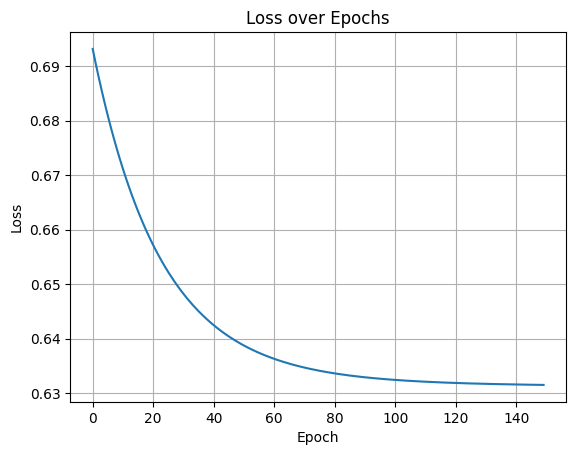

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/content/data (1).csv')

# 2. Separate features and target
feature = data.iloc[:, :-1].to_numpy()
target = data.iloc[:, -1].to_numpy()
num_samples, num_features = feature.shape
feature_transpose = feature.T
feature_bias = np.vstack([np.ones((1, num_samples)), feature_transpose])
theta = np.zeros((num_features + 1, 1))
y = target.reshape(1, -1)
n_epoch = 150
learning_rate = 0.00001
loss_history = []
epsilon = 1e-15

for epoch in range(n_epoch):
    z = theta.T @ feature_bias
    y_hat = sigmoid(z)

    loss = -1/num_samples * np.sum(y @ np.log(y_hat + epsilon).T + (1 - y) @ np.log(1 - y_hat + epsilon).T)
    loss_history.append(loss)
    #chain rule loss trước khi đến x (w,b) --> vẽ computational graph ra chain rule theo z trước khi tới w and b
    dz = y_hat - y
    dz_stack = np.vstack([dz] * (num_features + 1))

    element_wise_product = np.multiply(feature_bias, dz_stack)
    ones_vector = np.ones((num_samples,1))
    gradient = (element_wise_product @ ones_vector) / num_samples

    theta = theta - learning_rate * gradient

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{n_epoch}, Loss: {loss_history[-1]:.4f}")


plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.show()

In [ ]:
def predict_col_wise(features_with_bias_col_wise, theta_col_wise):
    z = theta_col_wise.T @ features_with_bias_col_wise
    predicted_probabilities = sigmoid(z)
    predictions = (predicted_probabilities >= 0.5).astype(int)
    return predictions

In [102]:
from sklearn.metrics import accuracy_score
predictions_col_wise = predict_col_wise(feature_bias, theta)
predictions_col_wise_reshaped = predictions_col_wise.T
accuracy_col_wise = accuracy_score(target.reshape(-1, 1), predictions_col_wise_reshaped)
print(f"Accuracy (Columns- Wise Sample): {accuracy_col_wise:.4f}")

Accuracy (Columns- Wise Sample): 0.6000


# Row Wise Sample

In [75]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

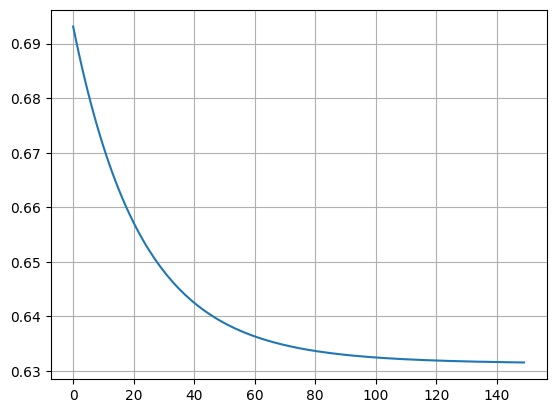

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('/content/data (1).csv')
feature = data.iloc[:, :-1].to_numpy()
target = data.iloc[:, -1].to_numpy()

x_b = np.hstack([np.ones((feature.shape[0], 1)), feature])
theta = np.zeros((num_features + 1, 1))
losses = []
n_epochs = 150
lr= 0.001
for epoch in range(n_epochs):
  z= x_b@theta
  y_hat = sigmoid(z)
  loss = -1/feature.shape[0] * (y @ np.log(y_hat + epsilon) + (1 - y) @ np.log(1 - y_hat + epsilon))
  losses.append(loss[0][0])
  dz = (y_hat -y.T)
  gradient = 1/feature.shape[0] * (dz.T@x_b)
  theta = theta - learning_rate * gradient.T

plt.plot(losses)
plt.grid(True)
plt.show()

In [96]:
def predict_row_wise(features_with_bias_row_wise, theta_row_wise):
    z = features_with_bias_row_wise @ theta_row_wise
    predicted_probabilities = sigmoid(z)
    predictions = (predicted_probabilities >= 0.5).astype(int)
    return predictions


In [101]:
predictions_row_wise = predict_row_wise(x_b, theta)
accuracy_row_wise = accuracy_score(target.reshape(-1, 1), predictions_row_wise)

print(f"Accuracy (Row Wise Sample): {accuracy_row_wise:.4f}")

Accuracy (Row Wise Sample): 0.6000
